In [35]:
#loading the required packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import plotnine as p9 
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [3]:
raw_data = pd.read_csv('./data/masked_dataset/train.csv')
print('The shape of the dataset :' + str(raw_data.shape))
raw_data.head()

The shape of the dataset :(100, 3)


,x1,x2,y
0,0.784119,0.948352,1.437410
1,0.911072,0.787079,0.943558
2,0.549740,0.906819,1.197050
3,0.036095,0.791149,0.408959
4,0.581530,0.609205,0.836620


In [5]:
print(raw_data.describe())

               x1          x2           y
count  100.000000  100.000000  100.000000
mean     0.444403    0.523374    0.554952
std      0.288595    0.291111    0.421430
min      0.000457    0.012779   -0.191714
25%      0.222642    0.265002    0.222144
50%      0.401859    0.527564    0.519598
75%      0.682649    0.784647    0.879761
max      0.996337    0.949549    1.499445


In [12]:
print(raw_data.isnull().sum())  # Check for missing values

x1    0
x2    0
y     0
dtype: int64


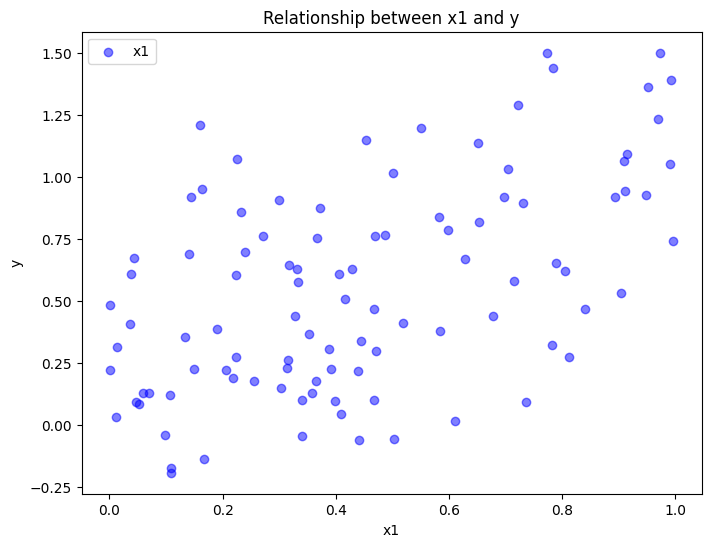

In [6]:
# Scatter plot for x1 vs y
plt.figure(figsize=(8, 6))
plt.scatter(raw_data['x1'], raw_data['y'], color='blue', alpha=0.5, label='x1')
plt.title('Relationship between x1 and y')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

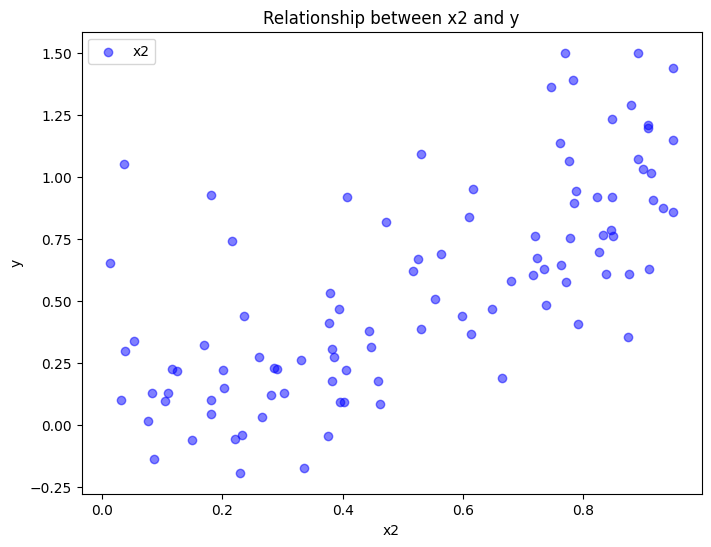

In [10]:
# Scatter plot for x2 vs y
plt.figure(figsize=(8, 6))
plt.scatter(raw_data['x2'], raw_data['y'], color='blue', alpha=0.5, label='x2')
plt.title('Relationship between x2 and y')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.show()

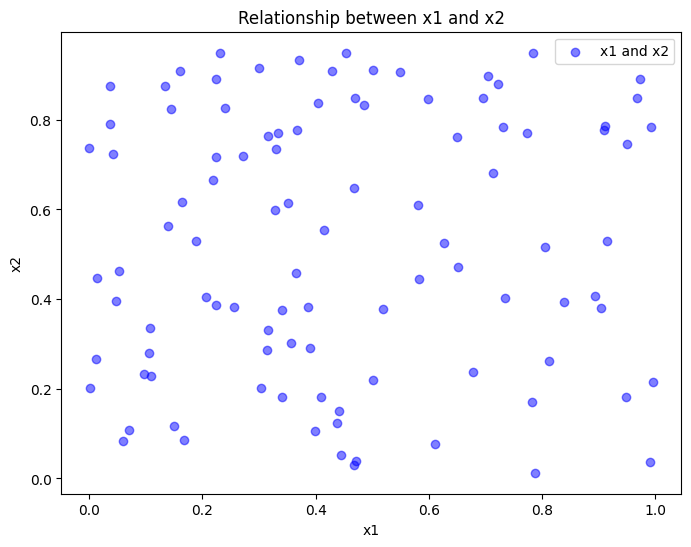

In [11]:
# Scatter plot for x1 vs x2 for checking multi-collinearity - Not evident
plt.figure(figsize=(8, 6))
plt.scatter(raw_data['x1'], raw_data['x2'], color='blue', alpha=0.5, label='x1 and x2')
plt.title('Relationship between x1 and x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## * x2 and y are positively correlated

# Linear Regression training

In [13]:
raw_data

,x1,x2,y
0,0.784119,0.948352,1.437410
1,0.911072,0.787079,0.943558
2,0.549740,0.906819,1.197050
3,0.036095,0.791149,0.408959
4,0.581530,0.609205,0.836620
...,...,...,...
95,0.108033,0.335304,-0.173461
96,0.438655,0.124661,0.218181
97,0.404851,0.837397,0.609993
98,0.444191,0.053309,0.338044


In [44]:
X=raw_data.drop("y", axis=1)
y=raw_data[["y"]]

In [53]:
from sklearn.pipeline import make_pipeline

Lin_reg = make_pipeline(LinearRegression())
Lin_reg_rmses = -cross_val_score(Lin_reg, X=X, y=y, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(Lin_reg_rmses).describe()

count    10.000000
mean      0.210302
std       0.062748
min       0.145003
25%       0.160895
50%       0.199388
75%       0.237627
max       0.349032
dtype: float64

In [54]:

forest_reg = make_pipeline(RandomForestRegressor(random_state=42))
y_np = y.to_numpy().reshape(-1)
forest_rmses = -cross_val_score(forest_reg, X=X, y=y_np, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

# Random Forest has better variance

count    10.000000
mean      0.215811
std       0.048852
min       0.139870
25%       0.186025
50%       0.212700
75%       0.241687
max       0.305705
dtype: float64

In [55]:
# Grid search for hyperparameter tuning 

param_grid = [
{ 
 'randomforestregressor__n_estimators':[2500,3000,3500, 4000],
   'randomforestregressor__max_depth':[2,3, 5,10,20,30,35,40]
 }
]

y_np = y.to_numpy().reshape(-1)

grid_search = GridSearchCV(forest_reg, param_grid, cv=3,scoring='neg_root_mean_squared_error') 
grid_search.fit(X, y_np)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'randomforestregressor__max_depth': [2, 3, 5, 10, 20,
                                                               30, 35, 40],
                          'randomforestregressor__n_estimators': [2500, 3000,
                                                                  3500,
                                                                  4000]}],
             scoring='neg_root_mean_squared_error')

In [58]:
# Checking the best parameters
best_params = grid_search.best_params_
display("Best parameters:", best_params)



'Best parameters:'

{'randomforestregressor__max_depth': 3,
 'randomforestregressor__n_estimators': 3500}

## Running the best model

In [59]:
# best model of GridSearchCV - Random forest 
best_model = grid_search.best_estimator_
forest_rmses = -cross_val_score(best_model, X=X, y=y_np, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.206565
std       0.043409
min       0.140693
25%       0.182102
50%       0.204403
75%       0.228978
max       0.297400
dtype: float64